In [ ]:
# Some liks
# https://www.kaggle.com/c/titanic#
# https://www.kaggle.com/aselad/exploratory-data-analysis-on-the-titanic-dataset

# De acuerdo con la descripción de la base de datos,
# (https://www.kaggle.com/c/titanic#), la variable objetivo (y) corresponde
# a la columna 'Survived', y las variables independientes (predictores, X) son
# el resto de las columnas.

In [114]:
import numpy as np              # numerical python
import pandas as pd             # dealing with dataframes (excel-like tables)
import matplotlib.pyplot as plt # Basic plots
import seaborn as sns           # Advanced plots. Built on top of matplotlib.
import math

# Part 0: Load data and clean data

In [115]:
# Load dataset
data_str ='../E900/process/080807_WearMillingY_50%/Level_002/Trace_080807_101102R00R110R40R50R60.csv'
df = pd.read_csv(data_str)
print(df.shape)
df.head()

(6581, 8)


,time,+/Nck/!SD/nckServoDataActCurr32 [u1; 1],+/Nck/!SD/nckServoDataActCurr32 [u1; 2],+/Nck/!SD/nckServoDataActCurr32 [u1; 4],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3],+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4],+/Channel/!RP/rpa [u1; 15]
0,0.000,0.13202,-0.07947,1.80469,235.52499,-338.03159,128231.39844,1.0
1,0.002,0.13074,-0.07819,1.79443,235.52499,-338.03180,128256.68750,NaN
2,0.004,0.13202,-0.07947,1.83545,235.52499,-338.03201,128282.00000,NaN
3,0.006,0.13202,-0.07947,2.04053,235.52499,-338.03214,128307.27344,NaN
4,0.008,0.13202,-0.07819,1.84570,235.52499,-338.03226,128332.57031,1.0


In [116]:
# Print info
df.info()

# mapping directory
map_dir = {'time' : 'time',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 1]': 'IqAx1', 
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 2]': 'IqAx2',
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 3]': 'IqAx3',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 1]': 'posAx1',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 2]': 'posAx2',
           '+/Nck/!SD/nckServoDataActPos2ndEnc32 [u1; 3]': 'posAx3', 
           '+/Nck/!SD/nckServoDataActPower32 [u1; 6]': 'PowerSp',
           '+/Nck/!SD/nckServoDataActVelMot32 [u1; 6]':'VelMotSp', 
           '+/Nck/!SD/nckServoDataActCurr32 [u1; 4]': 'IqAx4',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 1]': 'pos1stEncAx1',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2]': 'pos1stEncAx2',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3]': 'pos1stEncAx3',
           '+/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4]': 'pos1stEncAx4',
           '+/Channel/!RP/rpa [u1; 15]': 'R5'}
df.rename(columns=map_dir, inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6581 entries, 0 to 6580
Data columns (total 8 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   time                                          6581 non-null   float64
 1   +/Nck/!SD/nckServoDataActCurr32 [u1; 1]       6581 non-null   float64
 2   +/Nck/!SD/nckServoDataActCurr32 [u1; 2]       6581 non-null   float64
 3   +/Nck/!SD/nckServoDataActCurr32 [u1; 4]       6581 non-null   float64
 4   +/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 2]  6581 non-null   float64
 5   +/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 3]  6581 non-null   float64
 6   +/Nck/!SD/nckServoDataActPos1stEnc32 [u1; 4]  6581 non-null   float64
 7   +/Channel/!RP/rpa [u1; 15]                    1646 non-null   float64
dtypes: float64(8)
memory usage: 411.4 KB


,time,IqAx1,IqAx2,IqAx4,pos1stEncAx2,pos1stEncAx3,pos1stEncAx4,R5
0,0.000,0.13202,-0.07947,1.80469,235.52499,-338.03159,128231.39844,1.0
1,0.002,0.13074,-0.07819,1.79443,235.52499,-338.03180,128256.68750,NaN
2,0.004,0.13202,-0.07947,1.83545,235.52499,-338.03201,128282.00000,NaN
3,0.006,0.13202,-0.07947,2.04053,235.52499,-338.03214,128307.27344,NaN
4,0.008,0.13202,-0.07819,1.84570,235.52499,-338.03226,128332.57031,1.0


In [126]:
label = 'IqAx4'
iq =df[label]
iq.size

6581

Do some scales:
1. Standard scaler (with moving average value and standard deviation)

In [127]:
def moving_standard_scaler(time_series, num):
    """
    Optional docstring explaining the function.
    """
    # Function body
    # Your code here
    N = time_series.size
    maf_signal =  [0] * N
    maf_sima =  [0] * N
    mStdScOut =  [0] * N
    
    # standard scalar for 1st n values
    for k1 in range(0,num-1):
        maf_signal[k1] = sum(time_series[0:k1+1]) / len(maf_signal[0:k1+1])
        variance = sum((x - maf_signal[k1]) ** 2 for x in time_series[0:k1+1]) / time_series[0:k1+1].size
        maf_sima[k1]= math.sqrt(variance)
        maf_sima[0]=1
        mStdScOut[k1] = (time_series[k1] - maf_signal[k1])/maf_sima[k1]
    # standard scalar for values between n+1 and N
    for k2 in range(num,N-1):
        maf_signal[k2] = sum(time_series[k2-num:k2+1]) / len(maf_signal[k2-num:k2+1])
        variance = sum((x - maf_signal[k2]) ** 2 for x in time_series[k2-num:k2+1]) / len(time_series[k2-num:k2+1])
        maf_sima[k2]= math.sqrt(variance)
        mStdScOut[k2] = (time_series[k2] - maf_signal[k2])/maf_sima[k2]
    return mStdScOut  # Optional


In [128]:

test_iq =moving_standard_scaler(df[label], 12)


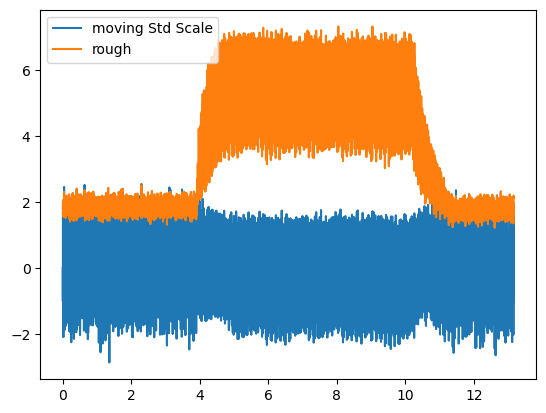

In [129]:
# time series plot before and after scaling

plt.plot(df['time'], test_iq, label = 'moving Std Scale')
plt.plot(df['time'], df[label], label = 'rough')
plt.legend(loc = 2)
plt.show()

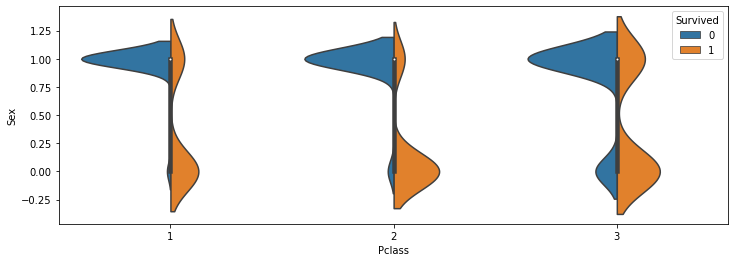

In [ ]:
# Correlation of two variables + target variable
plt.figure(figsize=(12, 4))
sns.violinplot(x='Pclass', y='Sex', hue='Survived', data=df, split=True)
plt.show()